#### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

#### Data Importation

In [2]:
product_detail = pd.read_csv(r"C:\Users\akann\OneDrive\Desktop\AMDARI\Project 2 - PREDICTIVE MODELLING\Predictive Modeling\Predictive-Modelling\Datasets\product_details.csv")
store_info = pd.read_csv(r"C:\Users\akann\OneDrive\Desktop\AMDARI\Project 2 - PREDICTIVE MODELLING\Predictive Modeling\Predictive-Modelling\Datasets\store_info.csv")
supplier_info = pd.read_csv(r"C:\Users\akann\OneDrive\Desktop\AMDARI\Project 2 - PREDICTIVE MODELLING\Predictive Modeling\Predictive-Modelling\Datasets\supplier_info.csv")
weather_data = pd.read_csv(r"C:\Users\akann\OneDrive\Desktop\AMDARI\Project 2 - PREDICTIVE MODELLING\Predictive Modeling\Predictive-Modelling\Datasets\weather_data.csv")
weekly_sales = pd.read_csv(r"C:\Users\akann\OneDrive\Desktop\AMDARI\Project 2 - PREDICTIVE MODELLING\Predictive Modeling\Predictive-Modelling\Datasets\weekly_sales.csv")

##### Data Details

In [3]:
# Product details 
pd.concat([product_detail.head(), product_detail.tail()])

,Product_ID,Product_Name,Product_Category,Shelf_Life_Days,Supplier_ID
0,1000,Whole Wheat Bread 800g,Bakery,4,4
1,1001,White Sandwich Loaf,Bakery,2,8
2,1002,Croissant 4-pack,Bakery,2,5
3,1003,Blueberry Muffins 6-pack,Bakery,4,10
4,1004,Chocolate Chip Cookies,Bakery,4,7
43,1043,English Breakfast Tea 80bags,Beverages,246,9
44,1044,Sparkling Water 1L,Beverages,186,1
45,1045,Lemonade 2L,Beverages,356,9
46,1046,Protein Shake 4-pack,Beverages,158,8
47,1047,Green Tea 40bags,Beverages,92,3


In [4]:
# Store_info data
pd.concat([store_info.head(), store_info.tail()])

,Store_ID,Region,Store_Size,Cold_Storage_Capacity
0,500,London,12000,3788
1,501,Midlands,5000,1086
2,502,North East,4000,998
3,503,Midlands,5000,1243
4,504,London,10000,3330
10,510,North East,3000,784
11,511,South West,3000,634
12,512,South East,5000,1697
13,513,South West,4000,1322
14,514,South West,3000,1001


In [5]:
# Supplier_info data
pd.concat([supplier_info.head(), supplier_info.tail()])

,Supplier_ID,Supplier_Name,Lead_Time_Days,Supply_Capacity
0,1,FreshFoods UK Ltd.,1,68047
1,2,Quality Provisions Co.,2,35230
2,3,FarmDirect Suppliers Ltd.,2,71976
3,4,PremiumGoods Wholesale,3,48776
4,5,LocalHarvest Distributors,2,11306
5,6,OrganicChoice Partners,2,31776
6,7,SwiftDelivery Foods UK,2,59474
7,8,TrustedSource Provisions,3,46959
8,9,GreenValley Suppliers,3,54320
9,10,BestQuality Foods Ltd.,2,53748


In [6]:
# Weather data
pd.concat([weather_data.head(), weather_data.tail()])

,Week_Number,Region,Avg_Temperature,Rainfall,Holiday_Flag
0,2024-W01,Midlands,7.4,32.1,0
1,2024-W01,South East,10.5,15.7,0
2,2024-W01,North West,6.8,28.5,1
3,2024-W01,London,9.9,23.0,1
4,2024-W01,South West,10.0,45.9,1
359,2024-W52,North West,7.4,17.2,1
360,2024-W52,London,11.6,10.4,1
361,2024-W52,South West,8.7,16.2,1
362,2024-W52,North East,5.2,19.2,1
363,2024-W52,Wales,9.6,12.8,1


In [7]:
# Weekly sales data
pd.concat([weekly_sales.head(), weekly_sales.tail()])

,Week_Number,Product_ID,Store_ID,Units_Sold,Marketing_Spend,Discount_Percent,Wastage_Units,Price
0,2024-W01,1000,500,4853,670.37,0,718,2.46
1,2024-W01,1001,500,4274,1089.62,0,641,1.27
2,2024-W01,1002,500,4215,1004.99,10,632,2.74
3,2024-W01,1003,500,5768,859.45,20,853,1.82
4,2024-W01,1004,500,3403,576.70,0,503,3.46
37435,2024-W52,1043,514,895,488.97,15,22,1.62
37436,2024-W52,1044,514,1558,657.76,10,38,5.05
37437,2024-W52,1045,514,993,442.56,0,24,5.72
37438,2024-W52,1046,514,2168,1502.52,25,54,3.82
37439,2024-W52,1047,514,658,940.83,0,16,4.37


#### Exploratory Data Analysis Stage 1

In [8]:
def Eda_Stage_1(data, name):
  print("="*100)
  print(f"{name} dataset information")
  print(data.info())
  print("="*100)
  print(f"{name} dataset shape")
  print(data.shape)
  print("="*100)
  print(f"{name} dataset description")
  print(data.describe())
  print("="*100)
  print(f"{name} dataset columns")
  print(data.columns)
  print("="*100)
  print(f"{name} dataset missing values")
  print(data.isna().sum())
  print("="*100)
  print(f"{name} dataset duplicate values")
  print(data.duplicated().sum())

##### Product Details

In [9]:
Eda_Stage_1(product_detail, "product_detail")

product_detail dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product_ID        48 non-null     int64 
 1   Product_Name      48 non-null     object
 2   Product_Category  48 non-null     object
 3   Shelf_Life_Days   48 non-null     int64 
 4   Supplier_ID       48 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.0+ KB
None
product_detail dataset shape
(48, 5)
product_detail dataset description
       Product_ID  Shelf_Life_Days  Supplier_ID
count       48.00        48.000000    48.000000
mean      1023.50        59.916667     5.958333
std         14.00        99.226333     2.782608
min       1000.00         2.000000     1.000000
25%       1011.75         4.000000     4.000000
50%       1023.50         7.500000     6.000000
75%       1035.25        36.250000     8.000000
max       1047.00       356.00

##### Store Info

In [10]:
Eda_Stage_1(store_info, "store_info")

store_info dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Store_ID               15 non-null     int64 
 1   Region                 15 non-null     object
 2   Store_Size             15 non-null     int64 
 3   Cold_Storage_Capacity  15 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 612.0+ bytes
None
store_info dataset shape
(15, 4)
store_info dataset description
         Store_ID    Store_Size  Cold_Storage_Capacity
count   15.000000     15.000000              15.000000
mean   507.000000   5333.333333            1527.066667
std      4.472136   2894.987458             965.651628
min    500.000000   3000.000000             634.000000
25%    503.500000   3500.000000             999.500000
50%    507.000000   4000.000000            1086.000000
75%    510.500000   5000.000000            1509.5000

##### Suplier Info

In [11]:
Eda_Stage_1(supplier_info, "supplier_info")

supplier_info dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Supplier_ID      10 non-null     int64 
 1   Supplier_Name    10 non-null     object
 2   Lead_Time_Days   10 non-null     int64 
 3   Supply_Capacity  10 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 452.0+ bytes
None
supplier_info dataset shape
(10, 4)
supplier_info dataset description
       Supplier_ID  Lead_Time_Days  Supply_Capacity
count     10.00000       10.000000        10.000000
mean       5.50000        2.200000     48161.200000
std        3.02765        0.632456     18121.601841
min        1.00000        1.000000     11306.000000
25%        3.25000        2.000000     38162.250000
50%        5.50000        2.000000     51262.000000
75%        7.75000        2.750000     58185.500000
max       10.00000        3.000000     71976.0000

##### Weather Data

In [12]:
Eda_Stage_1(weather_data, "weather_data")

weather_data dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Week_Number      364 non-null    object 
 1   Region           364 non-null    object 
 2   Avg_Temperature  364 non-null    float64
 3   Rainfall         364 non-null    float64
 4   Holiday_Flag     364 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 14.3+ KB
None
weather_data dataset shape
(364, 5)
weather_data dataset description
       Avg_Temperature    Rainfall  Holiday_Flag
count       364.000000  364.000000    364.000000
mean         10.015110   20.847253      0.148352
std           6.136098   10.459884      0.355937
min          -2.000000    6.600000      0.000000
25%           4.500000   12.550000      0.000000
50%           9.700000   18.600000      0.000000
75%          15.525000   27.825000      0.000000
max         

##### Weekly Sales

In [13]:
Eda_Stage_1(weekly_sales, "weekly_sales")

weekly_sales dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37440 entries, 0 to 37439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Week_Number       37440 non-null  object 
 1   Product_ID        37440 non-null  int64  
 2   Store_ID          37440 non-null  int64  
 3   Units_Sold        37440 non-null  int64  
 4   Marketing_Spend   37440 non-null  float64
 5   Discount_Percent  37440 non-null  int64  
 6   Wastage_Units     37440 non-null  int64  
 7   Price             37440 non-null  float64
dtypes: float64(2), int64(5), object(1)
memory usage: 2.3+ MB
None
weekly_sales dataset shape
(37440, 8)
weekly_sales dataset description
         Product_ID      Store_ID    Units_Sold  Marketing_Spend  \
count  37440.000000  37440.000000  37440.000000     37440.000000   
mean    1023.500000    507.000000   1642.154087       410.551195   
std       13.853584      4.320551   1166.477872

#### Exploratory Data Analysis Stage 2

In [14]:
(product_detail['Product_Category'].value_counts())

Product_Category
Bakery       12
Meat         12
Dairy        12
Beverages    12
Name: count, dtype: int64

In [15]:
print(f"we have total number of {len(product_detail)} product in the store")
print(f"we have the total number of {len(product_detail['Product_Category'].value_counts())} products type in the store")

we have total number of 48 product in the store
we have the total number of 4 products type in the store


In [16]:
# Based on all the regions
print(f"The sales for 52 weeks is: {len(weekly_sales)}")
print(f"The total number of units sold in {len(weather_data)} days is {weekly_sales['Units_Sold'].sum():,}")
print(f"The total number of units wasted or expired unit in {len(weather_data)} days is {weekly_sales['Wastage_Units'].sum():,}")
print(f"The average number of wasted units is {weekly_sales['Units_Sold'].mean():.2f}")
print(f"The average number of wasted units is {weekly_sales['Wastage_Units'].mean():2f}")

The sales for 52 weeks is: 37440
The total number of units sold in 364 days is 61,482,249
The total number of units wasted or expired unit in 364 days is 4,786,490
The average number of wasted units is 1642.15
The average number of wasted units is 127.844284


#### Regional Store Distribution - BAR CHARTS

In [17]:
store_info['Region'].value_counts()

Region
South West    4
London        3
Midlands      3
North East    2
North West    2
South East    1
Name: count, dtype: int64

#### Sales Performance by Region

Text(0, 0.5, 'Wastage Units')

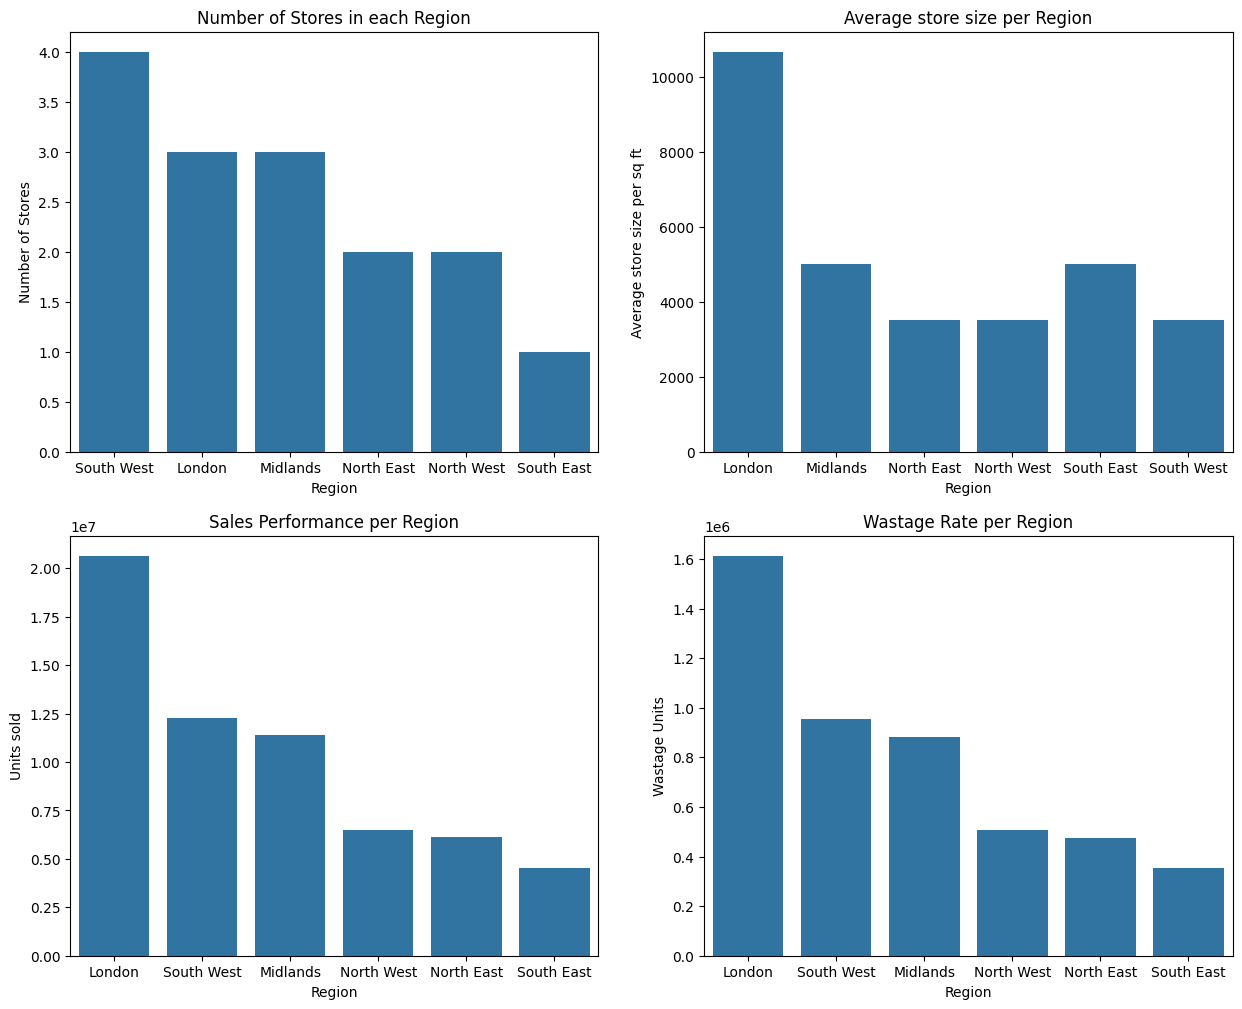

In [18]:
plt.figure(figsize=(15, 12))

# Number of stores in each region
plt.subplot(2, 2, 1)
region_store_counts = store_info['Region'].value_counts()
sns.barplot(x=region_store_counts.index, y=region_store_counts.values)
plt.title("Number of Stores in each Region")
plt.xlabel("Region")
plt.ylabel("Number of Stores")

# Average store size per region
plt.subplot(2, 2, 2)
store_size_by_region = store_info.groupby('Region')['Store_Size'].mean()
sns.barplot(x=store_size_by_region.index, y=store_size_by_region.values)
plt.title("Average store size per Region")
plt.xlabel("Region")
plt.ylabel("Average store size per sq ft")

# Sales performance per region
plt.subplot(2, 2, 3)
region_sales = weekly_sales.merge(store_info, on="Store_ID")
store_region_performance = region_sales.groupby('Region')['Units_Sold'].sum().sort_values(ascending=False)
sns.barplot(x=store_region_performance.index, y=store_region_performance.values)
plt.title("Sales Performance per Region")
plt.xlabel("Region")
plt.ylabel("Units sold")

# Wastage rate per region
plt.subplot(2, 2, 4)
goods_wastage_by_region = region_sales.groupby('Region')['Wastage_Units'].sum().sort_values(ascending=False)
sns.barplot(x=goods_wastage_by_region.index, y=goods_wastage_by_region.values)
plt.title("Wastage Rate per Region")
plt.xlabel("Region")
plt.ylabel("Wastage Units")

##### Average price per product across all categories
###### Discount performance

[0 1 2 3 4 5]


C:\Users\akann\AppData\Local\Temp\ipykernel_13204\2291571071.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_per_product_category.index,


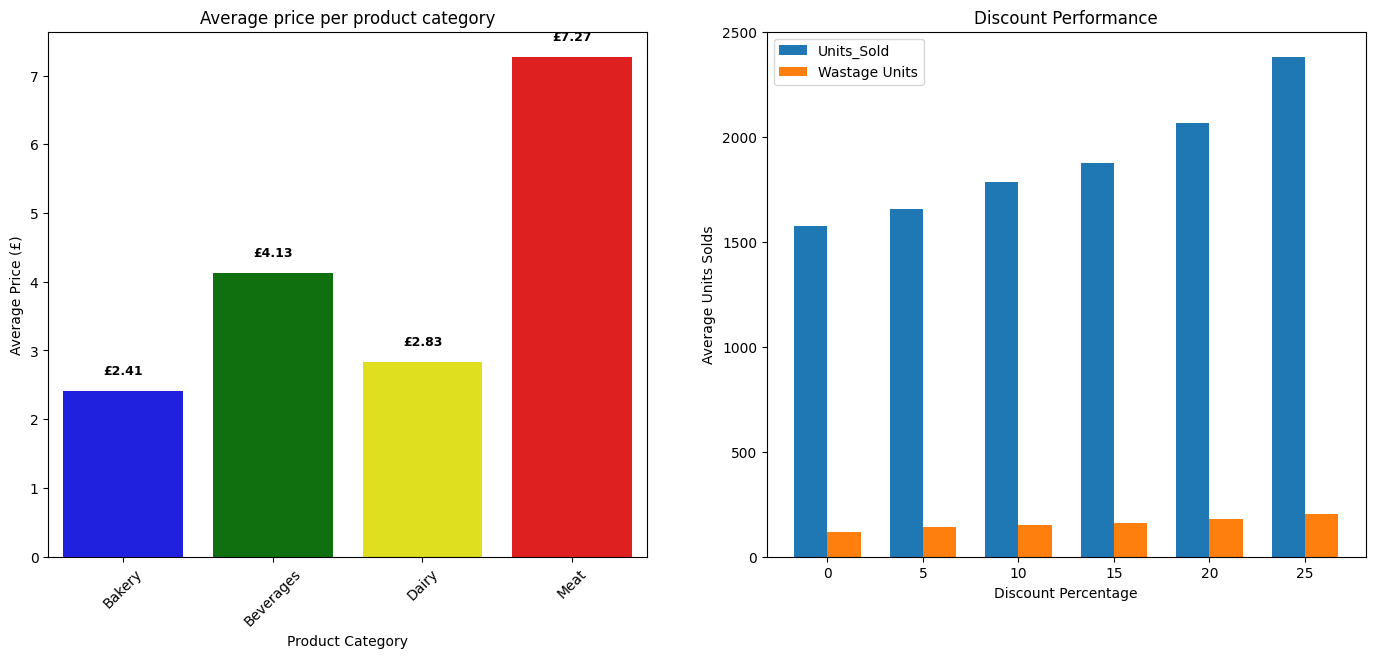

In [19]:
plt.figure(figsize=(17, 15))

plt.subplot(2, 2, 1)
# Average price product across all category
category_price = weekly_sales.merge(product_detail, on='Product_ID')
price_per_product_category = category_price.groupby('Product_Category')['Price'].mean()
sns.barplot(x=price_per_product_category.index,
            y=price_per_product_category.values,
            palette=["blue", "green", "yellow", "red"])
plt.title("Average price per product category")
plt.xlabel("Product Category")
plt.ylabel("Average Price (£)")
plt.xticks(rotation=45)

for i, (cat, val) in enumerate(zip(price_per_product_category.index, price_per_product_category.values)):
    plt.text(i, val + 0.2, f"£{val:.2f}",
             ha="center", va="bottom", fontweight="bold", fontsize=9)
    
    
# discount performance
# sales performance by each discount percentage

plt.subplot(2, 2, 2)
discount_performance = weekly_sales.groupby("Discount_Percent").agg({
    'Units_Sold': 'mean',
    'Wastage_Units': 'mean'
}).reset_index()

x = np.arange(len(discount_performance))
print(x)
width = 0.35

bars1 = plt.bar(x - width/2, discount_performance['Units_Sold'], width, label='Units_Sold')
bars2 = plt.bar(x + width/2, discount_performance['Wastage_Units'], width, label='Wastage Units')

plt.title("Discount Performance")
plt.xlabel("Discount Percentage")
plt.ylabel("Average Units Solds")
plt.xticks(x, discount_performance['Discount_Percent'])
plt.legend()



#### Sales Performance by Product Category - Comparison Bars

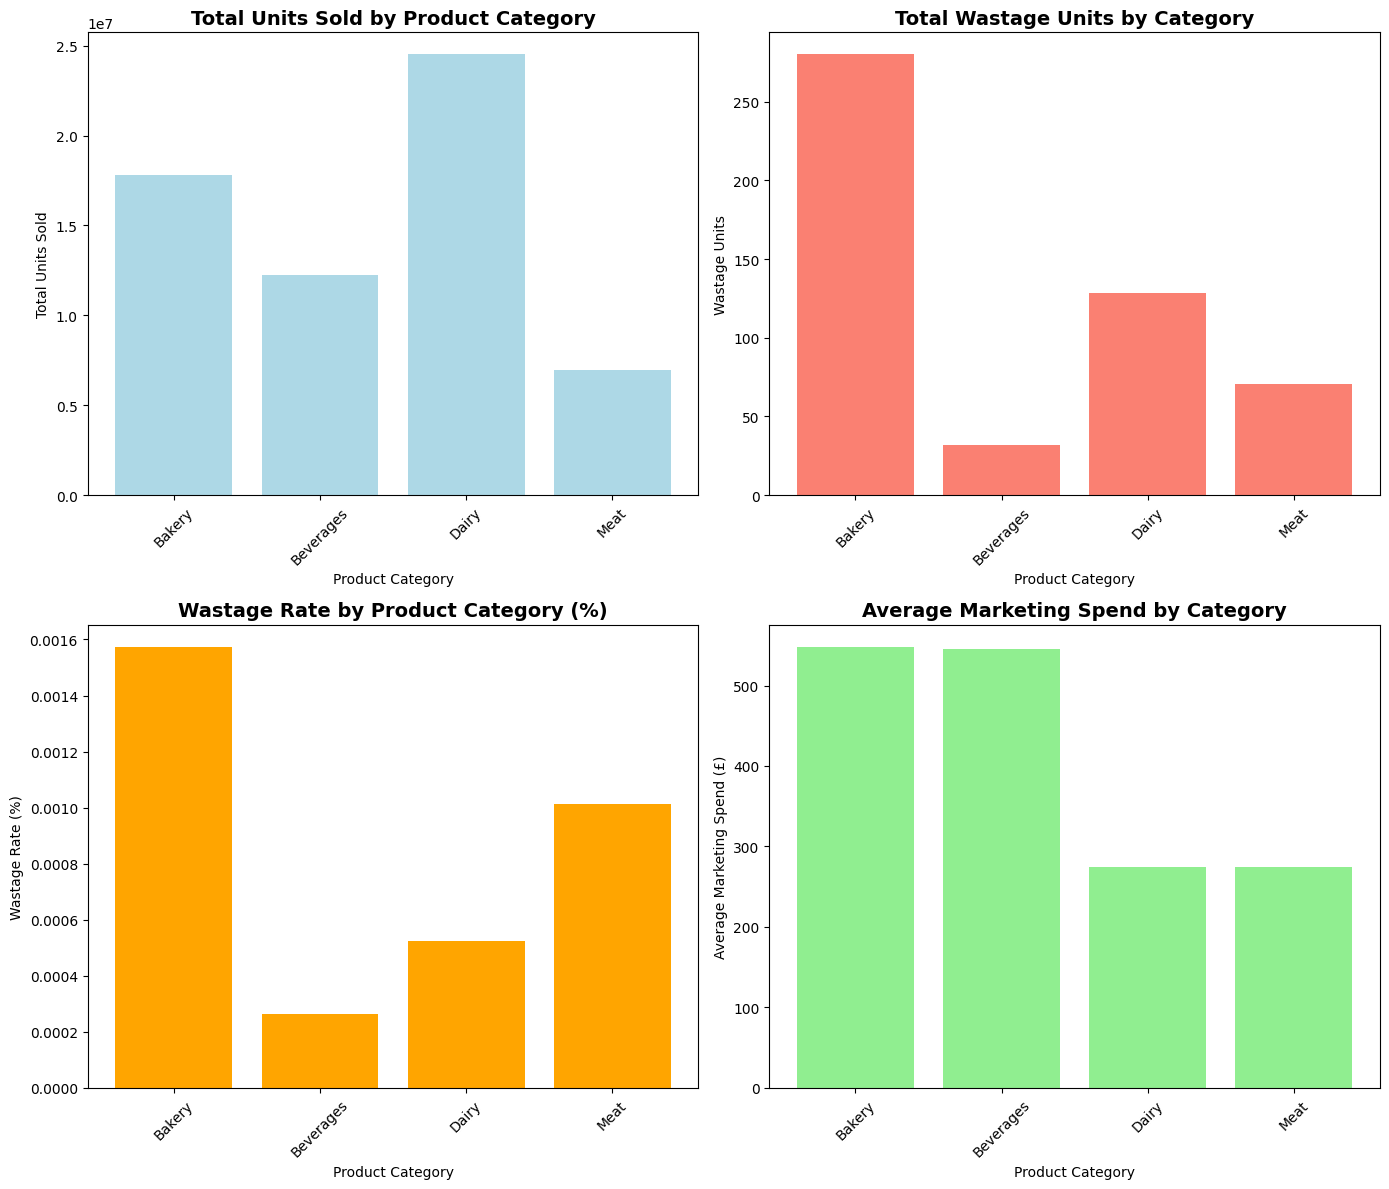

In [20]:
# CATEGORY PERFORMANCE

plt.figure(figsize=(14, 12))

# Merge Sales with Product Details
sales_with_categories = weekly_sales.merge(product_detail, on='Product_ID')

# Calculate metrics by category
category_metrics = sales_with_categories.groupby('Product_Category').agg({
    'Units_Sold': 'sum',
    'Price': 'mean',
    'Wastage_Units': 'mean',
    'Marketing_Spend': 'mean'
}).reset_index()

plt.subplot(2,2,1)
plt.bar(category_metrics['Product_Category'], category_metrics['Units_Sold'], color='lightblue')
plt.title('Total Units Sold by Product Category', fontsize=14, fontweight='bold')
plt.xlabel('Product Category')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)


plt.subplot(2,2,2)
plt.bar(category_metrics['Product_Category'], category_metrics['Wastage_Units'], color='salmon')
plt.title('Total Wastage Units by Category', fontsize=14, fontweight='bold')
plt.xlabel('Product Category')
plt.ylabel('Wastage Units')
plt.xticks(rotation=45)

plt.subplot(2,2,3)
# Wastage Rate calculation
category_metrics['Wastage_Rate'] = category_metrics['Wastage_Units'] / category_metrics['Units_Sold'] * 100
plt.bar(category_metrics['Product_Category'], category_metrics['Wastage_Rate'], color='orange')
plt.title('Wastage Rate by Product Category (%)', fontsize=14, fontweight='bold')
plt.xlabel('Product Category')
plt.ylabel('Wastage Rate (%)')
plt.xticks(rotation=45)


# Average marketing funds spent on each product category
plt.subplot(2,2,4)
plt.bar(category_metrics['Product_Category'], category_metrics['Marketing_Spend'], color='lightgreen')
plt.title('Average Marketing Spend by Category', fontsize=14, fontweight='bold')
plt.xlabel('Product Category')
plt.ylabel('Average Marketing Spend (£)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [21]:
# Compare sales at the best discount vs. no discount, and calculate the percentage sales lift
discount_sales = weekly_sales[weekly_sales['Discount_Percent'] == 25]
no_discount_sales = weekly_sales[weekly_sales['Discount_Percent'] == 0]

discount_units_sold = discount_sales['Units_Sold'].sum()
no_discount_units_sold = no_discount_sales['Units_Sold'].sum()

# Calculate percentage lift
sales_lift = ((discount_units_sold - no_discount_units_sold) / no_discount_units_sold) * 100

print(f"Units Sold with 25% Discount: {discount_units_sold}")
print(f"Units Sold with No Discount: {no_discount_units_sold}")
print(f"Sales Lift at 25% Discount: {sales_lift:.2f}%")

Units Sold with 25% Discount: 2060812
Units Sold with No Discount: 45269818
Sales Lift at 25% Discount: -95.45%


#### BUSINESS INSIGHTS & STRATEGIC RECOMMENDATIONS

##### 1. Overall Business Performance

In [ ]:
# --- Overall Business Performance ---

weekly_sales['Units_Sold'] = pd.to_numeric(weekly_sales['Units_Sold'], errors='coerce')
weekly_sales['Wastage_Units'] = pd.to_numeric(weekly_sales['Wastage_Units'], errors='coerce')

total_units_sold = weekly_sales['Units_Sold'].sum()
total_wastage_units = weekly_sales['Wastage_Units'].sum()

# Avoid divide-by-zero
if total_units_sold != 0:
    overall_wastage_rate = (total_wastage_units / total_units_sold) * 100
else:
    overall_wastage_rate = 0

print("=== Overall Business Performance ===")
print(f"Total Units Sold: {total_units_sold:,.0f}")
print(f"Total Wastage Units: {total_wastage_units:,.0f}")
print(f"Overall Wastage Rate: {overall_wastage_rate:.2f}%")

# Insight summary
if overall_wastage_rate < 5:
    print("\nInsight: Excellent performance — minimal product loss relative to sales volume.")
elif overall_wastage_rate < 10:
    print("\nInsight: Moderate wastage rate — potential for optimization in supply or shelf-life management.")
else:
    print("\nInsight: High wastage rate detected — indicates overstocking or poor demand forecasting.")


=== Overall Business Performance ===
Total Units Sold: 61,482,249
Total Wastage Units: 4,786,490
Overall Wastage Rate: 7.79%

Insight: Moderate wastage rate — potential for optimization in supply or shelf-life management.


The overall business performance analysis reveals that FrostMart achieved a total of 61,482,249 units sold during the reporting period. Across all stores and product categories, a total of 4,786,490 units were recorded as wastage, resulting in an overall wastage rate of approximately 7.79%.

This moderate level of wastage suggests that while the business maintains strong sales performance, there is still room for improvement in inventory management and perishable product handling. The current wastage level indicates potential inefficiencies in areas such as demand forecasting, supply planning, or shelf-life management.

From a strategic standpoint, FrostMart could benefit from:

- Reviewing stock replenishment cycles to minimize overstocking of short-shelf-life items.

- Implementing data-driven forecasting models that incorporate weather and seasonal demand factors.

- Enhancing cold-storage utilization and supplier coordination to reduce spoilage and maintain freshness.

If the company successfully reduces wastage even by 2–3 percentage points, it could realize significant savings in operational costs while improving sustainability performance.

##### 2. Category Performance

In [31]:
# Merge Sales with Product Details
sales_with_categories = weekly_sales.merge(product_detail, on='Product_ID')

# Ensure numeric types
sales_with_categories['Units_Sold'] = pd.to_numeric(sales_with_categories['Units_Sold'], errors='coerce')
sales_with_categories['Wastage_Units'] = pd.to_numeric(sales_with_categories['Wastage_Units'], errors='coerce')
sales_with_categories['Price'] = pd.to_numeric(sales_with_categories['Price'], errors='coerce')

# Group by Product_Category
category_summary = sales_with_categories.groupby('Product_Category').agg(
    Total_Units_Sold=('Units_Sold', 'sum'),
    Total_Wastage=('Wastage_Units', 'sum'),
    Average_Price=('Price', 'mean')
).reset_index()

# Calculate wastage rate (%)
category_summary['Wastage_Rate(%)'] = (
    category_summary['Total_Wastage'] / category_summary['Total_Units_Sold'] * 100
).round(2)

# Key categories
highest_sales_category = category_summary.loc[category_summary['Total_Units_Sold'].idxmax(), 'Product_Category']
highest_wastage_category = category_summary.loc[category_summary['Wastage_Rate(%)'].idxmax(), 'Product_Category']
highest_avg_price_category = category_summary.loc[category_summary['Average_Price'].idxmax(), 'Product_Category']

# Display results
print("=== Category Performance Summary ===")
print(category_summary.sort_values('Total_Units_Sold', ascending=False))

print("\n=== Key Findings ===")
print(f"Highest Sales Category: {highest_sales_category}")
print(f"Highest Wastage Rate Category: {highest_wastage_category}")
print(f"Highest Average Price Category: {highest_avg_price_category}")


=== Category Performance Summary ===
  Product_Category  Total_Units_Sold  Total_Wastage  Average_Price  \
2            Dairy          24514345        1204579       2.828795   
0           Bakery          17802002        2622079       2.412673   
1        Beverages          12221362         300994       4.132543   
3             Meat           6944540         658838       7.274323   

   Wastage_Rate(%)  
2             4.91  
0            14.73  
1             2.46  
3             9.49  

=== Key Findings ===
Highest Sales Category: Dairy
Highest Wastage Rate Category: Bakery
Highest Average Price Category: Meat


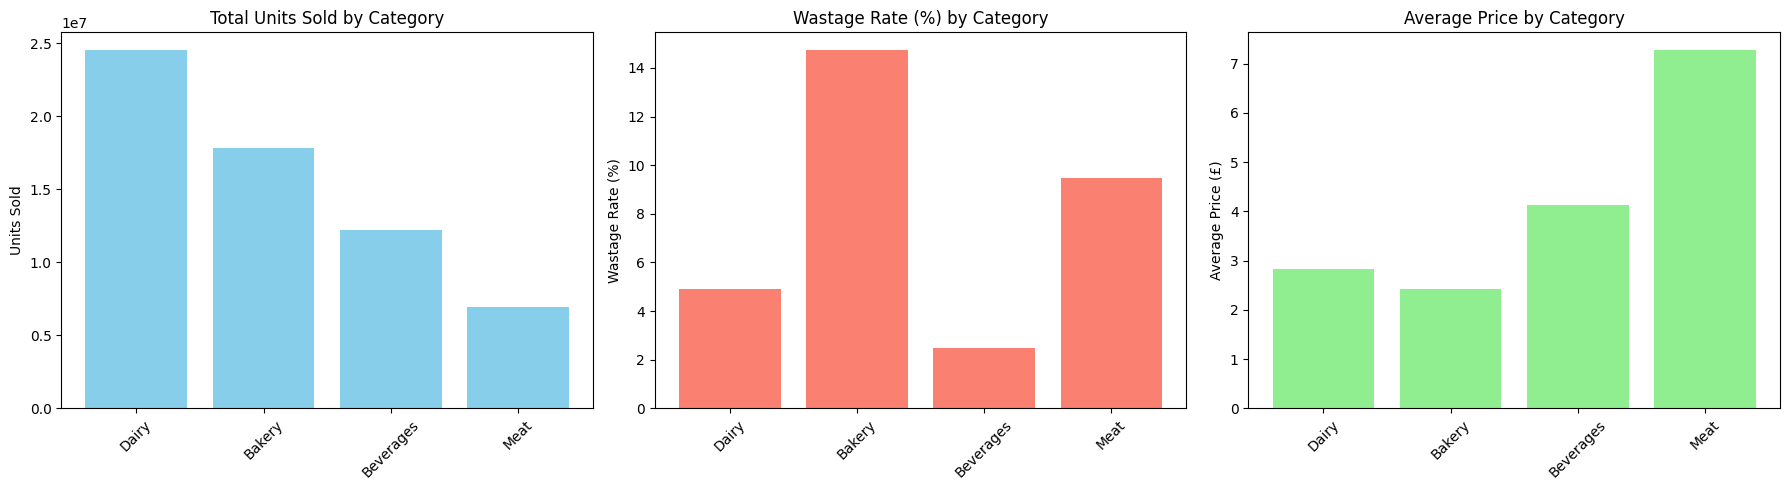

In [32]:
# Sort categories for consistent plotting
category_summary_sorted = category_summary.sort_values('Total_Units_Sold', ascending=False)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1️⃣ Total Units Sold
axes[0].bar(category_summary_sorted['Product_Category'], category_summary_sorted['Total_Units_Sold'], color='skyblue')
axes[0].set_title('Total Units Sold by Category')
axes[0].set_ylabel('Units Sold')
axes[0].tick_params(axis='x', rotation=45)

# 2️⃣ Wastage Rate (%)
axes[1].bar(category_summary_sorted['Product_Category'], category_summary_sorted['Wastage_Rate(%)'], color='salmon')
axes[1].set_title('Wastage Rate (%) by Category')
axes[1].set_ylabel('Wastage Rate (%)')
axes[1].tick_params(axis='x', rotation=45)

# 3️⃣ Average Price
axes[2].bar(category_summary_sorted['Product_Category'], category_summary_sorted['Average_Price'], color='lightgreen')
axes[2].set_title('Average Price by Category')
axes[2].set_ylabel('Average Price (£)')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


##### 3. Regional Performance